In [12]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [13]:
#weather stuff for top six cities in US [New_york , Los Angeles , San Francisco , Chicago , Washington , San Diego]

url_list={'New_york':'https://forecast.weather.gov/MapClick.php?lat=42.93708397900008&lon=-75.61070144699994#.X6iSLcSxXIU',
          'Los Angeles':'https://forecast.weather.gov/MapClick.php?lat=34.3428&lon=-118.2209#.X6iSYcSxXIU',
          'San Francisco':'https://forecast.weather.gov/MapClick.php?lat=37.7771&lon=-122.4196#.X6iS9cSxXIU',
          'Chicago':'https://forecast.weather.gov/MapClick.php?lat=41.8843&lon=-87.6324#.X6iTTsSxXIU',
         'Washington':'https://forecast.weather.gov/MapClick.php?lat=38.8904&lon=-77.032#.X6iTl8SxXIV',
          'San Diego':'https://forecast.weather.gov/MapClick.php?lat=32.7157&lon=-117.1617#.X6iT3sSxXIU'
         }
lis=[]
for key,value in url_list.items():
    page=requests.get(value)
    soup = BeautifulSoup(page.content, 'lxml')
    week=soup.find(id='seven-day-forecast-container')
    items=week.find_all(class_='tombstone-container')
    city=key
    name=[item.find(class_='period-name').text for item in items]
    desc=[item.find(class_='short-desc').text for item in items]
    temp=[item.find(class_='temp').text for item in items]
    weather_stuff=pd.DataFrame({'City':city,
            'Period':name,
            'Description':desc ,
            'Temperature':temp })
    lis.append(weather_stuff)
# concating all data to gether
weather_data = pd.concat(lis)

the temperature analysis periods are [Today , Tonight , Tuesday , TuesdayNight , VeteransDay , WednesdayNight , Thursday ,ThursdayNight , Friday , temperature week average],please choose from them .
Which period you wanna the temperature analysis?friday
City
Chicago          48
Los Angeles      49
New_york         53
San Diego        66
San Francisco    62
Washington       64
Name: Temperature_Degree, dtype: int32
AxesSubplot(0.125,0.125;0.775x0.755)


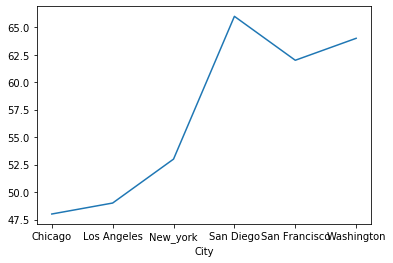

In [14]:
weather_data['Temperature_Degree']=weather_data['Temperature'].str[-5:-2]

weather_data['Temperature_Degree']=weather_data['Temperature_Degree'].astype(int)

new=['today','tonight','tuesday','tuesdaynight','veteransday','wednesdaynight','thursday','thursdayNight','friday','temperature week average']
print('the temperature analysis periods are [Today , Tonight , Tuesday , TuesdayNight , VeteransDay , WednesdayNight , Thursday ,ThursdayNight , Friday , temperature week average],please choose from them .')
temp_period =input('Which period you wanna the temperature analysis?')
if temp_period.lower().strip() in new:
    data=weather_data[weather_data['Period']== temp_period.lower().strip().title()]
    print(data.groupby('City')['Temperature_Degree'].mean().round())
    print(data.groupby('City')['Temperature_Degree'].mean().plot(kind='line'))
else:
    print('out of periods,please choose from the list up.')
